In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/train (1).csv")
test_df=pd.read_csv("/kaggle/input/shai-music-genre-classification-2/test (2).csv")

In [3]:
train_df.head()

Id          Artist Name       Track Name  Popularity  danceability  energy  \
0   1    Marina Maximilian       Not Afraid        37.0         0.334   0.536   
1   2       The Black Keys  Howlin' for You        67.0         0.725   0.747   
2   3  Royal & the Serpent          phuck u         NaN         0.584   0.804   
3   4   Detroit Blues Band      Missing You        12.0         0.515   0.308   
4   5         Coast Contra          My Lady        48.0         0.565   0.777   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   9.0    -6.649     0       0.0381      0.378000               NaN   
1  11.0    -5.545     1       0.0876      0.027200            0.0468   
2   7.0    -6.094     1       0.0619      0.000968            0.6350   
3   NaN   -14.711     1       0.0312      0.907000            0.0213   
4   6.0    -5.096     0       0.2490      0.183000               NaN   

   liveness  valence    tempo  duration_in min/ms  time_signature  Class  
0     0.106    0.235  152.429            204947.0               4      9  
1     0.104    0.380  132.921            191956.0               4      6  
2     0.284    0.635  159.953            161037.0               4     10  
3     0.300    0.501  172.472            298093.0               3      2  
4     0.211    0.619   88.311            254145.0               4      5

In [4]:
train_df.describe(include='all')

Id      Artist Name Track Name    Popularity  danceability  \
count   14396.000000            14396      14396  14063.000000  14396.000000   
unique           NaN             7913      12455           NaN           NaN   
top              NaN  Backstreet Boys       Fire           NaN           NaN   
freq             NaN               58          8           NaN           NaN   
mean     7198.500000              NaN        NaN     44.525208      0.543105   
std      4155.911573              NaN        NaN     17.418940      0.165517   
min         1.000000              NaN        NaN      1.000000      0.059600   
25%      3599.750000              NaN        NaN     33.000000      0.432000   
50%      7198.500000              NaN        NaN     44.000000      0.545000   
75%     10797.250000              NaN        NaN     56.000000      0.658000   
max     14396.000000              NaN        NaN    100.000000      0.989000   

              energy           key      loudness          mode   speechiness  \
count   14396.000000  12787.000000  14396.000000  14396.000000  14396.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.662422      5.953781     -7.900852      0.640247      0.080181   
std         0.235967      3.200013      4.057362      0.479944      0.085157   
min         0.001210      1.000000    -39.952000      0.000000      0.022500   
25%         0.508000      3.000000     -9.538000      0.000000      0.034800   
50%         0.699000      6.000000     -7.013500      1.000000      0.047100   
75%         0.861000      9.000000     -5.162000      1.000000      0.083100   
max         1.000000     11.000000      1.342000      1.000000      0.955000   

        acousticness  instrumentalness      liveness       valence  \
count   14396.000000      10855.000000  14396.000000  14396.000000   
unique           NaN               NaN           NaN           NaN   
top              NaN               NaN           NaN           NaN   
freq             NaN               NaN           NaN           NaN   
mean        0.246746          0.178129      0.195782      0.486379   
std         0.310922          0.304266      0.159258      0.239476   
min         0.000000          0.000001      0.011900      0.021500   
25%         0.004280          0.000088      0.097275      0.299000   
50%         0.081450          0.003920      0.129000      0.480500   
75%         0.432250          0.201000      0.256000      0.672000   
max         0.996000          0.996000      0.992000      0.986000   

               tempo  duration_in min/ms  time_signature         Class  
count   14396.000000        1.439600e+04    14396.000000  14396.000000  
unique           NaN                 NaN             NaN           NaN  
top              NaN                 NaN             NaN           NaN  
freq             NaN                 NaN             NaN           NaN  
mean      122.695372        2.000942e+05        3.924354      6.695679  
std        29.538490        1.116891e+05        0.359520      3.206170  
min        30.557000        5.016500e-01        1.000000      0.000000  
25%        99.799000        1.654458e+05        4.000000      5.000000  
50%       120.060000        2.089410e+05        4.000000      8.000000  
75%       141.988250        2.522470e+05        4.000000     10.000000  
max       217.416000        1.477187e+06        5.000000     10.000000

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [6]:
train_df.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

<Axes: >

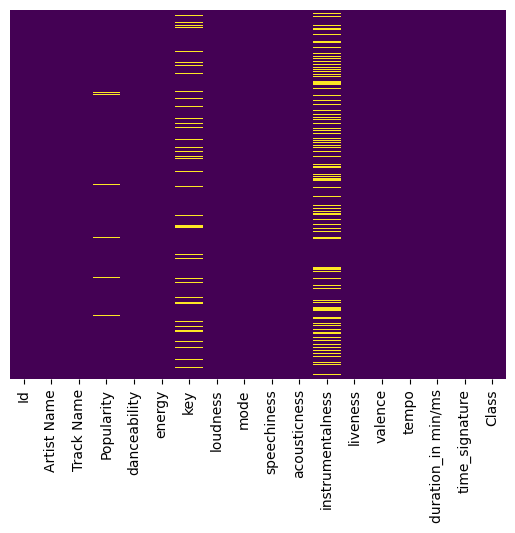

In [7]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train_df.corr()['Class'].sort_values(ascending = False)

/tmp/ipykernel_32/4107949684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['Class'].sort_values(ascending = False)


Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
Id                    0.002703
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


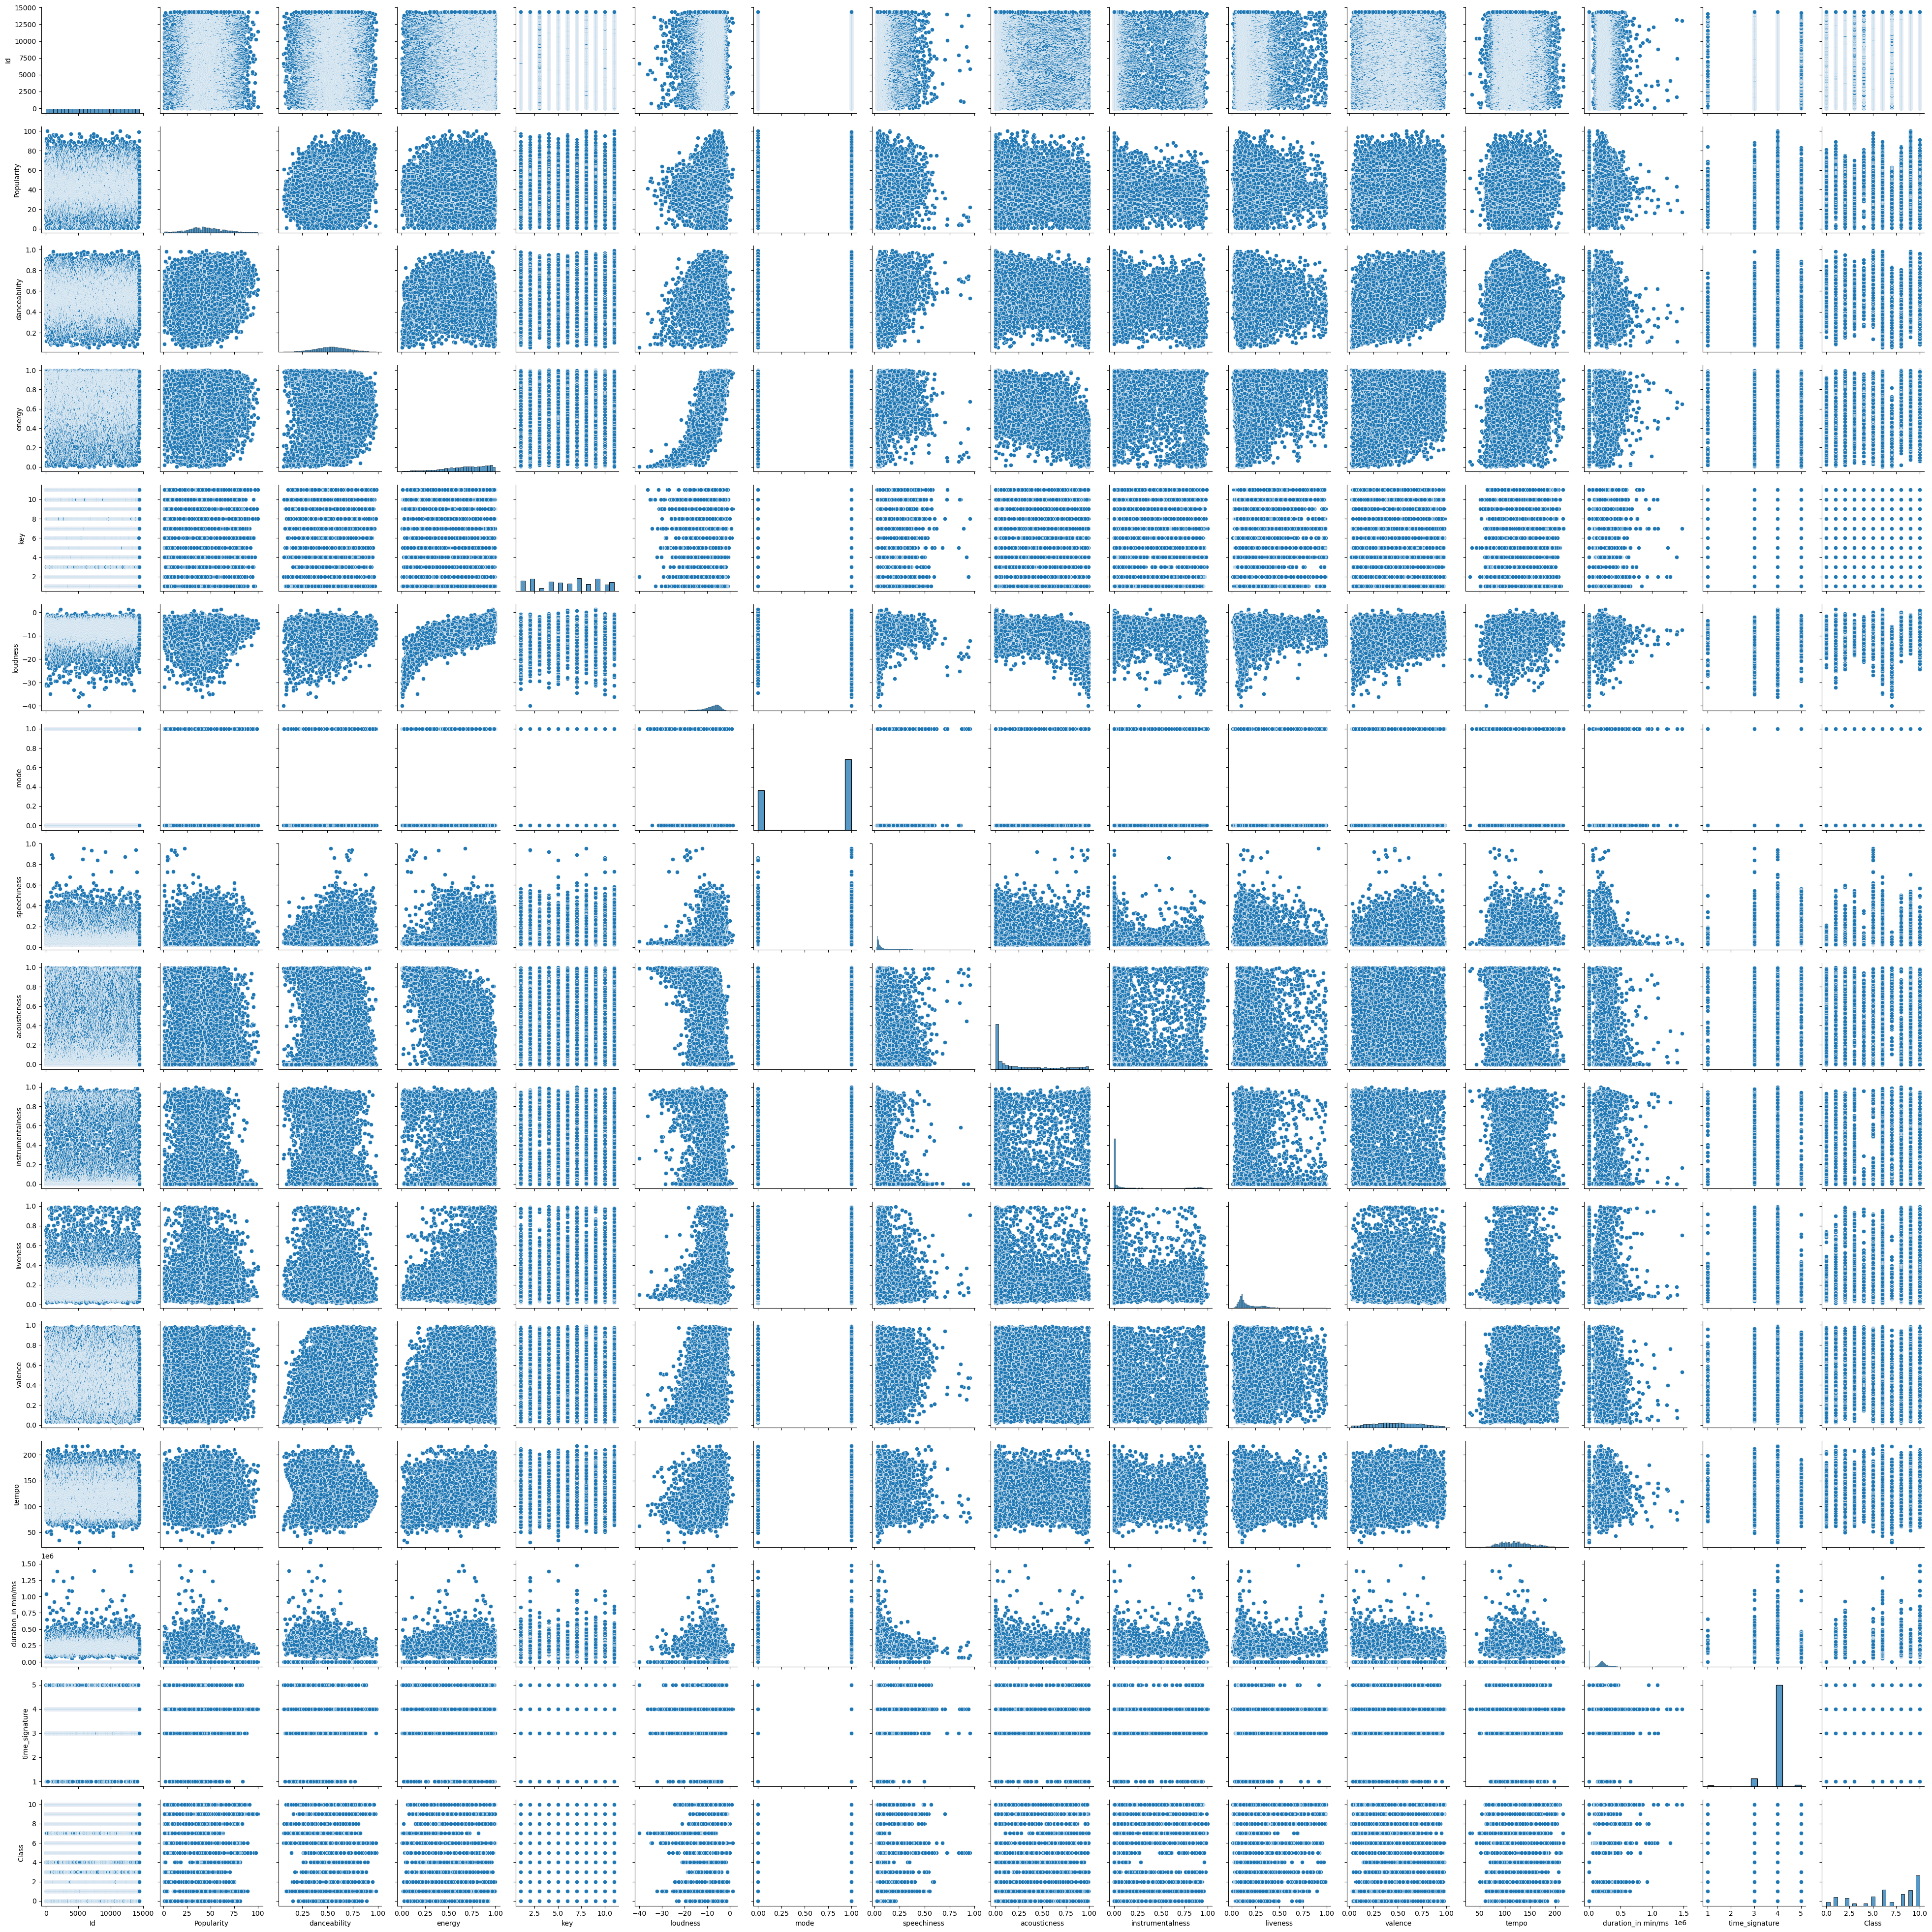

In [9]:
sns.pairplot(train_df)

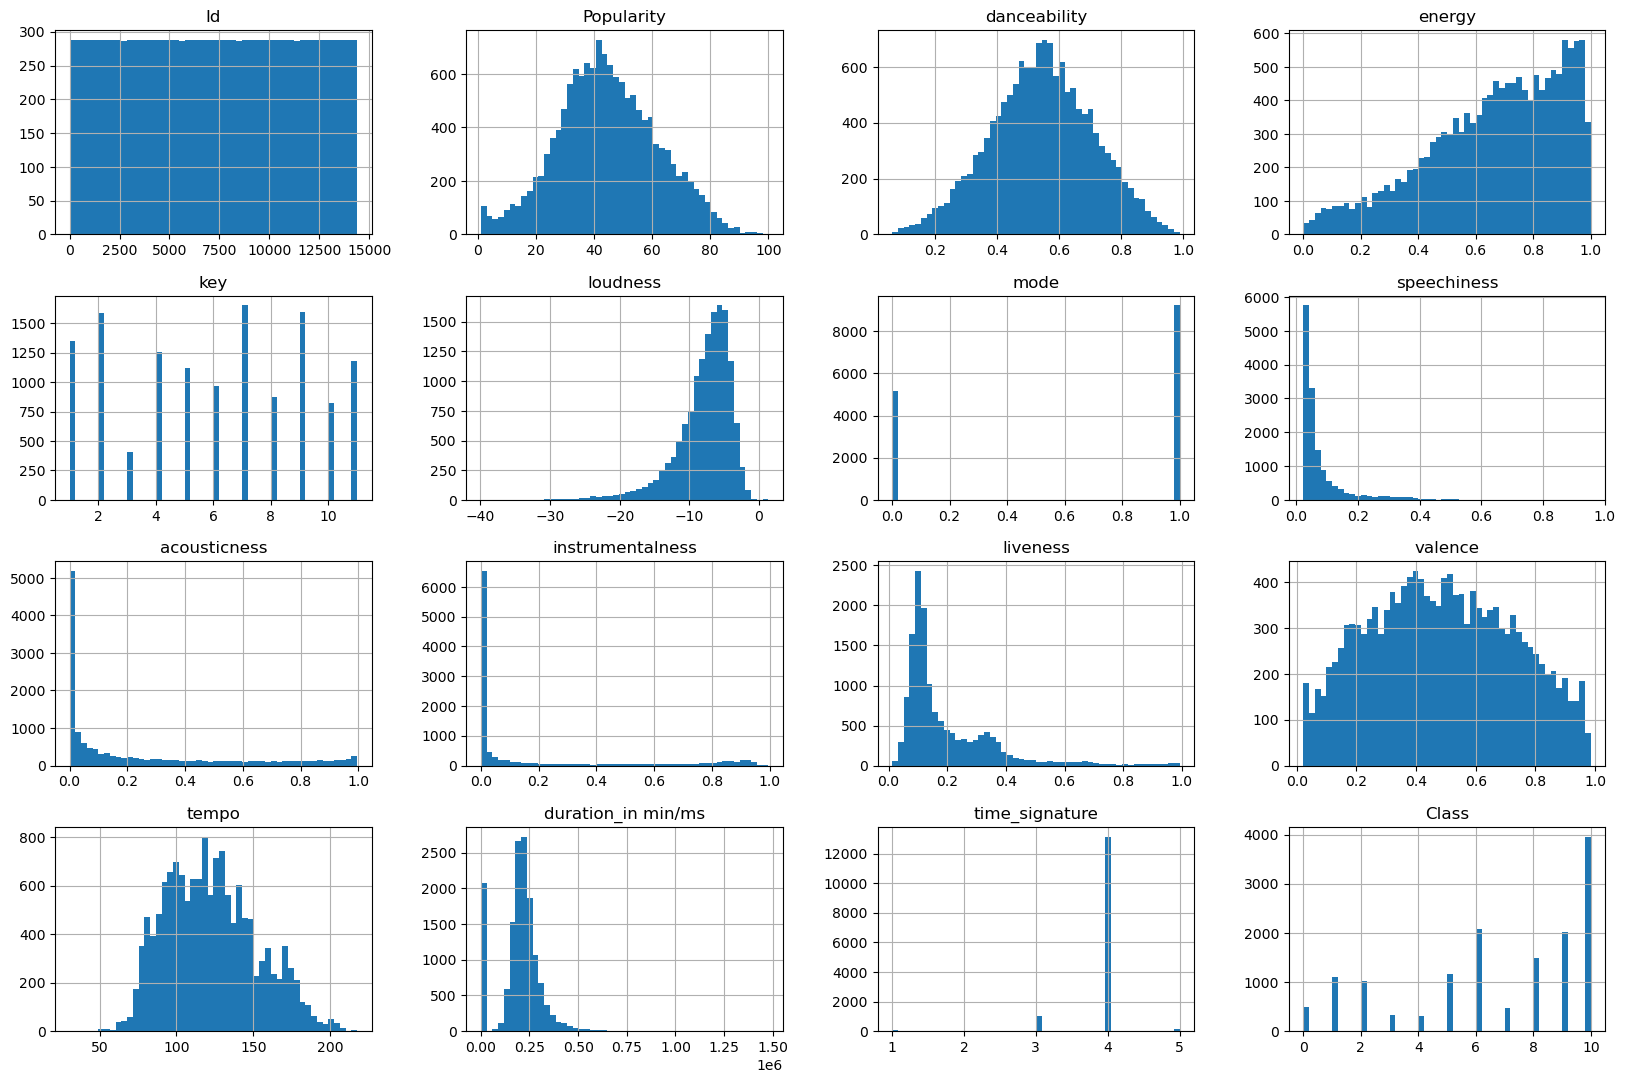

In [10]:
train_df.hist(bins=50, figsize=(20, 13))
plt.show()

In [11]:
train_df['loudness']=np.cbrt(train_df['loudness'])
train_df['speechiness']=np.reciprocal(train_df['speechiness'])
train_df['acousticness']=np.cbrt(train_df['acousticness'])
train_df['instrumentalness']=np.log(train_df['instrumentalness'])
train_df['liveness']=np.log(train_df['liveness'])
train_df['duration_in min/ms']=np.sqrt(train_df['duration_in min/ms'])
train_df['tempo']=np.cbrt(train_df['tempo'])

In [12]:
train_df['Popularity'].fillna(train_df['Popularity'].median (),inplace=True)
train_df['key'].fillna(train_df['key'].median (),inplace=True)
train_df['instrumentalness'].fillna(train_df['instrumentalness'].median (),inplace=True)

In [16]:
X=train_df.drop(columns=['Id','Artist Name','Track Name','Class'])
Y=train_df[['Class']]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          14396 non-null  float64
 1   danceability        14396 non-null  float64
 2   energy              14396 non-null  float64
 3   key                 14396 non-null  float64
 4   loudness            14396 non-null  float64
 5   mode                14396 non-null  int64  
 6   speechiness         14396 non-null  float64
 7   acousticness        14396 non-null  float64
 8   instrumentalness    14396 non-null  float64
 9   liveness            14396 non-null  float64
 10  valence             14396 non-null  float64
 11  tempo               14396 non-null  float64
 12  duration_in min/ms  14396 non-null  float64
 13  time_signature      14396 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 1.5 MB


In [18]:
Y

Class
0          9
1          6
2         10
3          2
4          5
...      ...
14391     10
14392      8
14393     10
14394     10
14395      4

[14396 rows x 1 columns]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipeline_rf = Pipeline([("scalar1", StandardScaler()),
                     ("rf", RandomForestClassifier(random_state=42))])
pipeline_sg = Pipeline([("scalar2", StandardScaler()),
                     ("sg", OneVsOneClassifier(SGDClassifier (random_state=42)))])
pipeline_lg = Pipeline([("scalar3", StandardScaler()),
                     ("lg", LogisticRegression(random_state=42))])
pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsClassifier())])
pipeline_svc = Pipeline([("scalar6", StandardScaler()),
                     ("svc", SVC(random_state=42))])


pipelines = [pipeline_rf, pipeline_sg,pipeline_lg,pipeline_kn,pipeline_svc,]

# # Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "RandomForestClassifier",1: "SGDClassifier",2: "LogisticRegression",3:"KNeighborsClassifier",4:"SVC"}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
modelRF = RandomForestClassifier(random_state=42)
# Define the search space of hyperparameters
param_dist = {
    'n_estimators': randint(10, 400),
    'max_depth': randint(1, 10),
    'min_samples_split':randint(2, 20),
    'min_samples_leaf': randint(1, 15),
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    modelRF, 
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
modelRF=random_search.best_estimator_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import reciprocal

modelovo = SGDClassifier( random_state=42)
# Define the search space of hyperparameters
param_dist = {
    'alpha': reciprocal(0.0001, 0.1),
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': reciprocal(0.0001, 0.1),
    'max_iter': [100, 200, 500]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    modelovo,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
modelovo=OneVsOneClassifier(random_search.best_estimator_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
modelLR = LogisticRegression(random_state=42)

# Define the search space of hyperparameters
param_dist = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    modelLR,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
modelLR=random_search.best_estimator_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
modelKNN = KNeighborsClassifier()

# Define the search space of hyperparameters
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    modelKNN,
    param_distributions=param_dist,
    n_iter=0,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
modelKNN=random_search.best_estimator_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
modelSVC = SVC(random_state=42)

# Define the search space of hyperparameters
param_dist = {
    'C': uniform(loc=0, scale=10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    modelSVC,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
modelSVC=random_search.best_estimator_

In [ ]:
modelSVC = SVC(random_state=42,gamma="scale",kernel="linear",C=7.319939418)
modelSVC.fit(X,Y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost classifier
adaboost_model = AdaBoostClassifier(base_estimator=[modelKNN, modelLR,modelovo,modelRF])

# Define the search space of hyperparameters
param_dist = {
    'n_estimators': randint(10, 400),
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    adaboost_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, Y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
pipelineFINAL = Pipeline([("scalar", StandardScaler()),
                     ("ada", random_search.best_estimator_)])
pipelineFINAL.fit(X,Y)

In [ ]:
X_test=test_df.drop(columns=['Id'])

In [ ]:
X_test['loudness']=np.cbrt(X_test['loudness'])
X_test['speechiness']=np.reciprocal(X_test['speechiness'])
X_test['acousticness']=np.cbrt(X_test['acousticness'])
X_test['instrumentalness']=np.log(X_test['instrumentalness'])
X_test['liveness']=np.log(X_test['liveness'])
X_test['duration_in min/ms']=np.sqrt(X_test['duration_in min/ms'])
X_test['tempo']=np.cbrt(X_test['tempo'])

In [ ]:
popm=X_test['Popularity'].median()
keym=X_test['key'].median()
insm=X_test['instrumentalness'].median()


X_test['Popularity']=X_test['Popularity'].replace(np.nan,popm)
X_test['key']=X_test['key'].replace(np.nan,keym)
X_test['instrumentalness']=X_test['instrumentalness'].replace(np.nan,insm)

In [ ]:
predictions =pipelineFINAL.predict(X_test)

In [ ]:
df=test_df[['Id']]
h=pd.DataFrame(predictions)
dfres=pd.merge(df,h,left_index=True,right_index=True)

In [ ]:
dfres=dfres[['Id',0]]
dfres.rename(columns={0:'Class'},inplace=True)

In [ ]:
dfres.head(40)

In [ ]:
dfres.to_csv('resultsfinal.csv',index=False)